In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import qutip

In [5]:
import nvmodels

In [100]:
import nvmodels.simulations.simple_cwodmr as scw

In [7]:
B_mag = 25e-4
polar = 0
azimuthal = 0
_x = np.sin(polar)*np.cos(azimuthal)
_y = np.sin(polar)*np.sin(azimuthal)
_z = np.cos(polar)
static_B_field = B_mag*np.array([_x, _y, _z])

In [8]:
h_gs, h_es, h_full = scw.hamiltonian(static_B_field)

#### Examine the H_full

This is the full Hamiltonian, including the long-lived inter-system crossing state.

It should be noted that the excited state Hamiltonian does not include the ~470 THz energy difference
relative to the ground state. As such, the excited states will appear in the plot at similar energy scale as
the ground state

In [9]:
h_full

Quantum object: dims = [[7], [7]], shape = (7, 7), type = oper, isherm = True
Qobj data =
[[ 1.02674587e+09  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.91333333e+09  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  8.86587468e+08  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.07167459e+10
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   8.70666667e+09  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.05765875e+10  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  5.00000000e+09]]

Text(0.5, 0, 'State index')

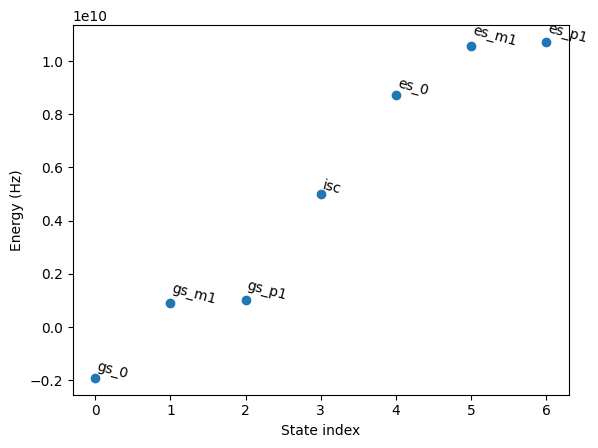

In [10]:
eigenvalues, eigenstates = h_full.eigenstates()

fig, ax = nvmodels.plotting.plot_eigenspectrum_mpl(eigenvalues, scw.state_ids().keys())
ax.set_ylabel('Energy (Hz)')
ax.set_xlabel('State index')

# state labels:
# gs_0 -- ground state, ms=0
# isc -- inter-system crossing
# es_p1 -- excited state, ms=+1
# etc...

# Evolve the system

In [83]:
gamma_optical_pump = scw.build_transfer_rates(h_full, rabi_frequency=0)
pump_times = times = np.linspace(0,5e-6,2000)

gamma_all_off = scw.build_transfer_rates(h_full, optical_pumping_watts=0, rabi_frequency=0)
off_times = np.linspace(0,2.5e-6,1000)

gamma_rf = scw.build_transfer_rates(h_full, optical_pumping_watts=0, rabi_frequency=1e6, rabi_state='gs_m1')
rf_drive_times = np.linspace(0,5e-6,2000)


In [99]:
qutip.Qobj(gamma_optical_pump)

Quantum object: dims = [[7], [7]], shape = (7, 7), type = oper, isherm = False
Qobj data =
[[0.00000000e+00 3.33175051e+02 3.33175051e+02 0.00000000e+00
  3.30000000e+06 0.00000000e+00 0.00000000e+00]
 [3.33333333e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.30000000e+06 0.00000000e+00]
 [3.33333333e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 3.30000000e+06]
 [3.46020761e+06 2.15982721e+06 2.15982721e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.32911392e+07 0.00000000e+00 0.00000000e+00 1.30039012e+07
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.32911392e+07 0.00000000e+00 8.00000000e+07
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.32911392e+07 8.00000000e+07
  0.00000000e+00 0.00000000e+00 0.00000000e+00]]

In [102]:
qutip.Qobj(gamma_rf)

Quantum object: dims = [[7], [7]], shape = (7, 7), type = oper, isherm = False
Qobj data =
[[0.00000000e+00 1.00033318e+06 3.33175051e+02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00033333e+06 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.33333333e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.46020761e+06 2.15982721e+06 2.15982721e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.32911392e+07 0.00000000e+00 0.00000000e+00 1.30039012e+07
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.32911392e+07 0.00000000e+00 8.00000000e+07
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.32911392e+07 8.00000000e+07
  0.00000000e+00 0.00000000e+00 0.00000000e+00]]

In [84]:
observables = []
observables.append(scw.pl_rate_observable(gamma_optical_pump)) 
observables += [obs for obs in scw.state_population_observables(gamma_optical_pump.shape[0])]

In [91]:
num_cycles = 4
psi_0 = scw.psi0_ground_state(h_full)

results = {}
full_times = []

for i in range(num_cycles):
    
    print(f'cycle {i}')

    # optical pump
    r = qutip.mesolve(h_full, 
                      psi_0, 
                      pump_times, 
                      scw.build_Lindblad_operators(gamma_optical_pump).values(), 
                      observables)
    results[f'optical_c{i}-1'] = r
    if len(full_times):
        full_times.append(full_times[-1][-1] + r.times)
    else:
        full_times.append(r.times)
    
    # all off
    r = qutip.mesolve(h_full, 
                      scw.psi0_from_results(r.expect[1:]), 
                      off_times, 
                      scw.build_Lindblad_operators(gamma_all_off).values(), 
                      observables)
    results[f'off_c{i}-1'] = r
    full_times.append(full_times[-1][-1] + r.times)
    
    #rf on
    r = qutip.mesolve(h_full, 
                      scw.psi0_from_results(r.expect[1:]), 
                      rf_drive_times, 
                      scw.build_Lindblad_operators(gamma_rf).values(), 
                      observables)
    results[f'rf_c{i}'] = r
    full_times.append(full_times[-1][-1] + r.times)

    #all off
    r = qutip.mesolve(h_full, 
                      scw.psi0_from_results(r.expect[1:]), 
                      off_times, 
                      scw.build_Lindblad_operators(gamma_all_off).values(), 
                      observables)
    results[f'off_c{i}-2'] = r
    full_times.append(full_times[-1][-1] + r.times)
    
    #optical pump then long off
    r = qutip.mesolve(h_full, 
                      scw.psi0_from_results(r.expect[1:]), 
                      pump_times, 
                      scw.build_Lindblad_operators(gamma_optical_pump).values(), 
                      observables)
    results[f'optical_c{i}-2'] = r
    full_times.append(full_times[-1][-1] + r.times)

    #all off
    r = qutip.mesolve(h_full, 
                      scw.psi0_from_results(r.expect[1:]), 
                      off_times, 
                      scw.build_Lindblad_operators(gamma_all_off).values(), 
                      observables)
    results[f'off_c{i}-3'] = r
    full_times.append(full_times[-1][-1] + r.times)

    #all off
    r = qutip.mesolve(h_full, 
                      scw.psi0_from_results(r.expect[1:]), 
                      rf_drive_times, 
                      scw.build_Lindblad_operators(gamma_all_off).values(), 
                      observables)    
    results[f'off_c{i}-4'] = r
    full_times.append(full_times[-1][-1] + r.times)

    #all off
    r = qutip.mesolve(h_full, 
                      scw.psi0_from_results(r.expect[1:]), 
                      off_times, 
                      scw.build_Lindblad_operators(gamma_all_off).values(), 
                      observables)
    results[f'off_c{i}-5'] = r
    full_times.append(full_times[-1][-1] + r.times)

    
    psi_0 = scw.psi0_from_results(r.expect[1:])

cycle 0
cycle 1
cycle 2
cycle 3


In [92]:
full_observables = [r.expect for r in results.values()]

In [93]:
full_observables = np.hstack( full_observables)

In [94]:
full_times = np.hstack( full_times)

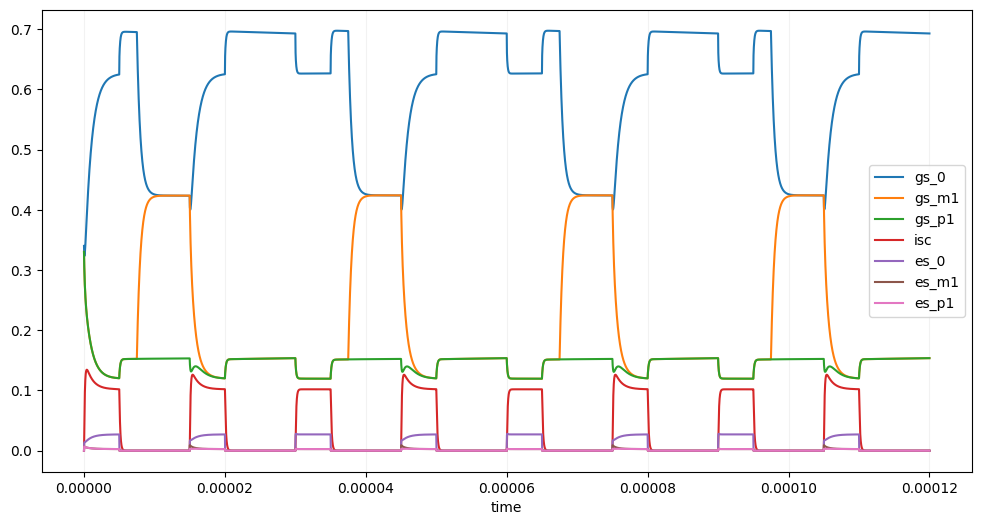

In [95]:
fig, ax = scw.plot_observables(full_times, full_observables[1:], scw.state_ids().keys(), figsize=(12,6))
ax.grid(axis='x', color='0.95')


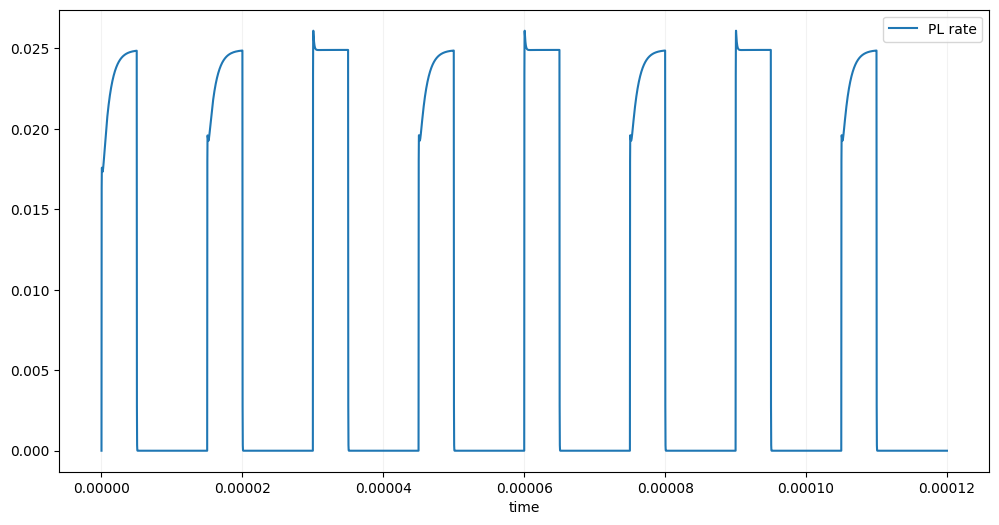

In [96]:
fig, ax = scw.plot_observables(full_times, full_observables[:1], ['PL rate'], figsize=(12,6))
ax.grid(axis='x', color='0.95')

In [127]:
h_rf = scw.add_rabi_oscillation_to_hamiltonian(h_full, 1e6, rabi_phase=0)

In [128]:
h_rf

Quantum object: dims = [[7], [7]], shape = (7, 7), type = oper, isherm = True
Qobj data =
[[ 1.02674587e+09  5.00000000e+05  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.00000000e+05 -1.91333333e+09  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  8.86587468e+08  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.07167459e+10
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   8.70666667e+09  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.05765875e+10  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  5.00000000e+09]]

In [129]:
qutip.Qobj(gamma_rf)

Quantum object: dims = [[7], [7]], shape = (7, 7), type = oper, isherm = False
Qobj data =
[[0.00000000e+00 1.00033318e+06 3.33175051e+02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00033333e+06 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.33333333e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.46020761e+06 2.15982721e+06 2.15982721e+06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.32911392e+07 0.00000000e+00 0.00000000e+00 1.30039012e+07
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.32911392e+07 0.00000000e+00 8.00000000e+07
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.32911392e+07 8.00000000e+07
  0.00000000e+00 0.00000000e+00 0.00000000e+00]]

In [130]:
eigenvalues, eigenstates = h_rf.eigenstates()

Text(0.5, 0, 'State index')

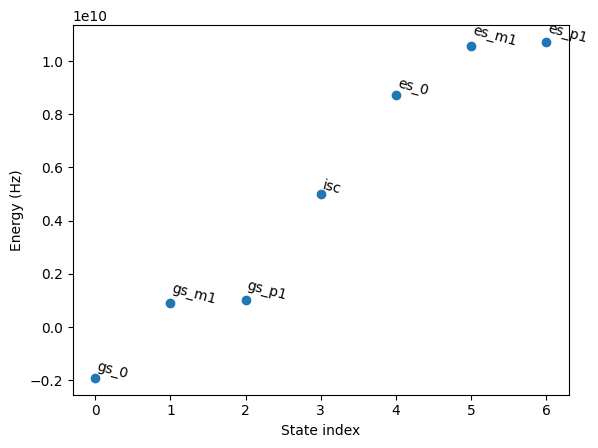

In [131]:
fig, ax = nvmodels.plotting.plot_eigenspectrum_mpl(eigenvalues, scw.state_ids().keys())
ax.set_ylabel('Energy (Hz)')
ax.set_xlabel('State index')

# state labels:
# gs_0 -- ground state, ms=0
# isc -- inter-system crossing
# es_p1 -- excited state, ms=+1
# etc...

In [132]:
gamma_optical_pump = scw.build_transfer_rates(h_full, rabi_frequency=0)
pump_times = times = np.linspace(0,5e-6,2000)

gamma_all_off = scw.build_transfer_rates(h_full, optical_pumping_watts=0, rabi_frequency=0)
off_times = np.linspace(0,2.5e-6,1000)

#gamma_rf = scw.build_transfer_rates(h_full, optical_pumping_watts=0, rabi_frequency=1e6, rabi_state='gs_m1')
h_rf = scw.add_rabi_oscillation_to_hamiltonian(h_full, 1e6, rabi_phase=np.pi/2)
rf_drive_times = np.linspace(0,5e-6,2000)


In [133]:
num_cycles = 4
psi_0 = scw.psi0_ground_state(h_full)

results = {}
full_times = []

for i in range(num_cycles):
    
    print(f'cycle {i}')

    # optical pump
    r = qutip.mesolve(h_full, 
                      psi_0, 
                      pump_times, 
                      scw.build_Lindblad_operators(gamma_optical_pump).values(), 
                      observables)
    results[f'optical_c{i}-1'] = r
    if len(full_times):
        full_times.append(full_times[-1][-1] + r.times)
    else:
        full_times.append(r.times)
    
    # all off
    r = qutip.mesolve(h_full, 
                      scw.psi0_from_results(r.expect[1:]), 
                      off_times, 
                      scw.build_Lindblad_operators(gamma_all_off).values(), 
                      observables)
    results[f'off_c{i}-1'] = r
    full_times.append(full_times[-1][-1] + r.times)
    
    #rf on
    r = qutip.mesolve(h_rf, # NB -- switch to H_rf, but gamma_all_off
                      scw.psi0_from_results(r.expect[1:]), 
                      rf_drive_times, 
                      scw.build_Lindblad_operators(gamma_all_off).values(), 
                      observables)
    results[f'rf_c{i}'] = r
    full_times.append(full_times[-1][-1] + r.times)

    #all off
    r = qutip.mesolve(h_full, 
                      scw.psi0_from_results(r.expect[1:]), 
                      off_times, 
                      scw.build_Lindblad_operators(gamma_all_off).values(), 
                      observables)
    results[f'off_c{i}-2'] = r
    full_times.append(full_times[-1][-1] + r.times)
    
    #optical pump then long off
    r = qutip.mesolve(h_full, 
                      scw.psi0_from_results(r.expect[1:]), 
                      pump_times, 
                      scw.build_Lindblad_operators(gamma_optical_pump).values(), 
                      observables)
    results[f'optical_c{i}-2'] = r
    full_times.append(full_times[-1][-1] + r.times)

    #all off
    r = qutip.mesolve(h_full, 
                      scw.psi0_from_results(r.expect[1:]), 
                      off_times, 
                      scw.build_Lindblad_operators(gamma_all_off).values(), 
                      observables)
    results[f'off_c{i}-3'] = r
    full_times.append(full_times[-1][-1] + r.times)

    #all off
    r = qutip.mesolve(h_full, 
                      scw.psi0_from_results(r.expect[1:]), 
                      rf_drive_times, 
                      scw.build_Lindblad_operators(gamma_all_off).values(), 
                      observables)    
    results[f'off_c{i}-4'] = r
    full_times.append(full_times[-1][-1] + r.times)

    #all off
    r = qutip.mesolve(h_full, 
                      scw.psi0_from_results(r.expect[1:]), 
                      off_times, 
                      scw.build_Lindblad_operators(gamma_all_off).values(), 
                      observables)
    results[f'off_c{i}-5'] = r
    full_times.append(full_times[-1][-1] + r.times)

    
    psi_0 = scw.psi0_from_results(r.expect[1:])

cycle 0
cycle 1
cycle 2
cycle 3


In [134]:
full_observables = [r.expect for r in results.values()]
full_observables = np.hstack( full_observables)
full_times = np.hstack( full_times)

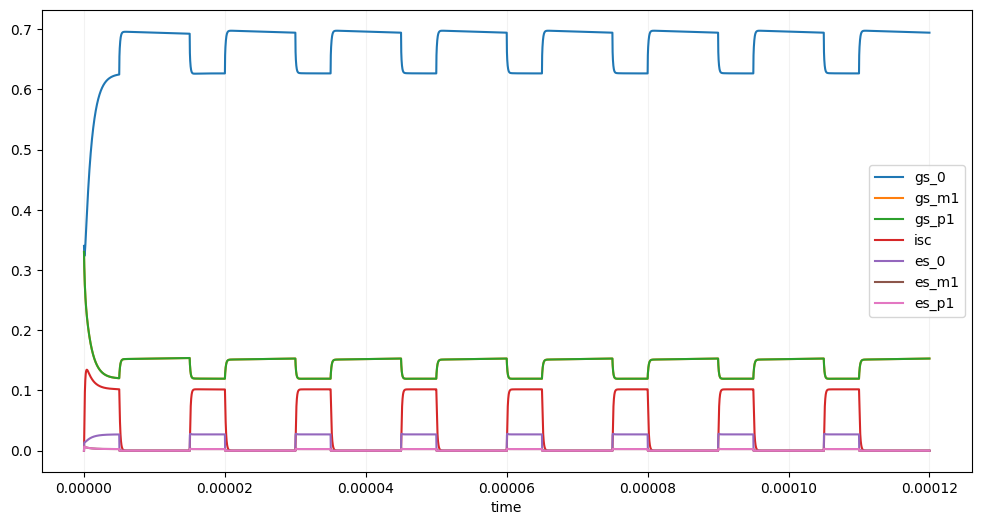

In [135]:
fig, ax = scw.plot_observables(full_times, full_observables[1:], scw.state_ids().keys(), figsize=(12,6))
ax.grid(axis='x', color='0.95')


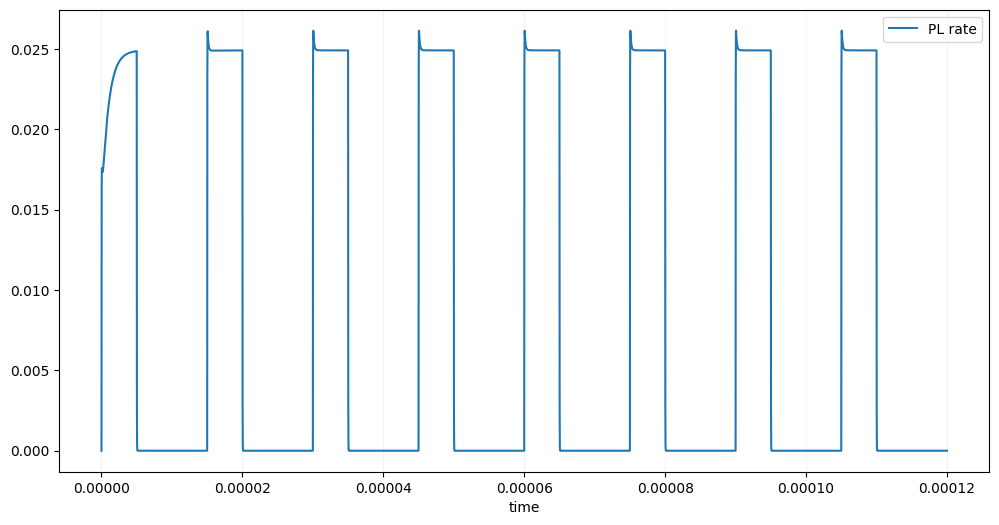

In [136]:
fig, ax = scw.plot_observables(full_times, full_observables[:1], ['PL rate'], figsize=(12,6))
ax.grid(axis='x', color='0.95')